In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset.
df = pd.read_csv('/Users/harshini/Desktop/Thinkful/Data/Capstone3/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Check for null values.
df.isnull().sum()

# Drop 'Serial No.'
df = df.drop('Serial No.',axis=1)

# Renaming columns.
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_')

In [4]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [5]:
# Check if the data types are correct as per the meaning of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE_Score            400 non-null int64
TOEFL_Score          400 non-null int64
University_Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance_of_Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [6]:
# Descriptive statistics.
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


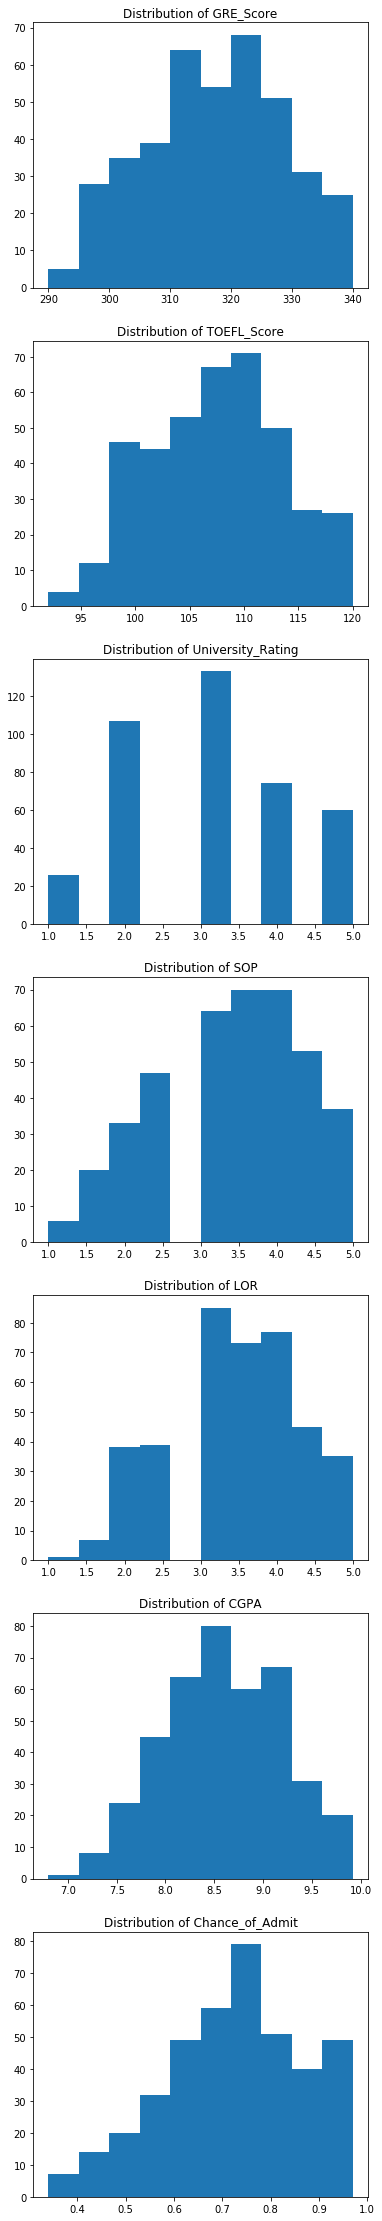

In [7]:
cols = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']

plt.figure(figsize=(6,40))

for i in range(len(cols)):
    plt.subplot(7,1,i+1)
    plt.hist(df[cols[i]])
    plt.title("Distribution of " + cols[i])

plt.show()

From the above GRE_Score, TOEFL_Score and CGPA are some what normally distributed and the target variable 'Chance_of_Admit' is left skewed.<br/>
Let us observe the correlation between the target variable and independent variables.

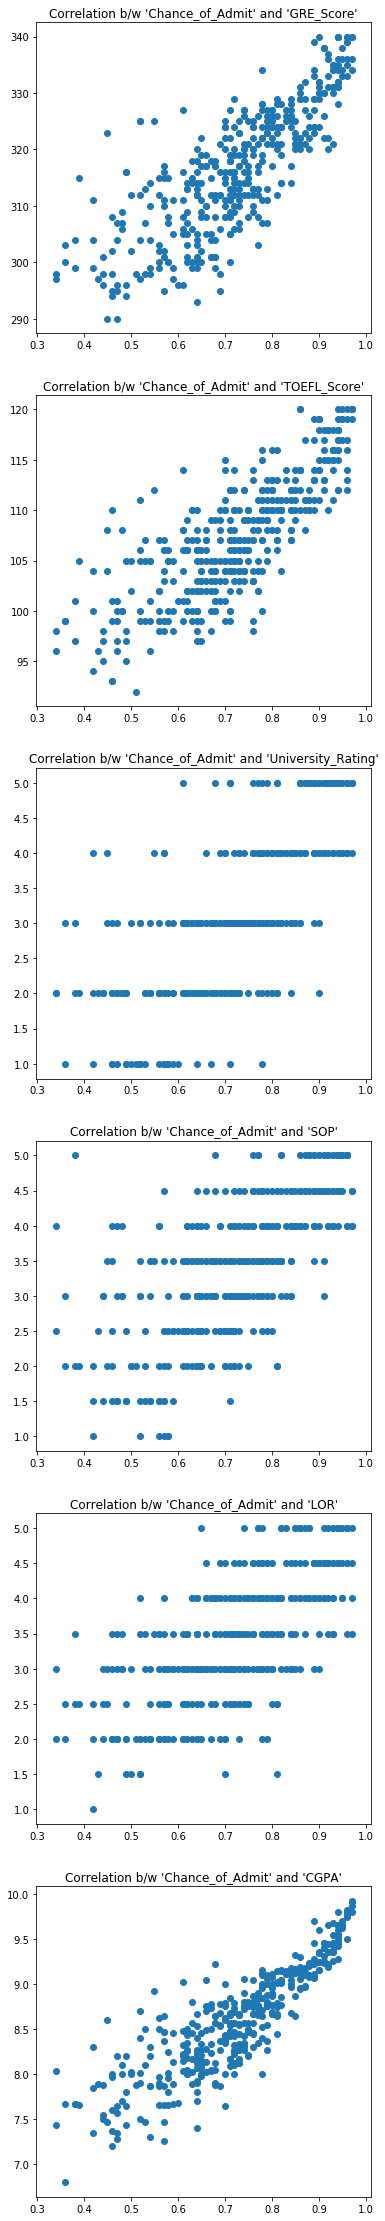

In [8]:
cols = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA']

plt.figure(figsize=(6,40))

for i in range(len(cols)):
    plt.subplot(6,1,i+1)
    plt.scatter(df['Chance_of_Admit'],df[cols[i]])
    plt.title("Correlation b/w 'Chance_of_Admit' and '{}'".format(cols[i]))

plt.show()

Above plots show that there is a linear relation between target variable and GRE_Score, TOEFL_Score and CGPA. However, let us statistically confirm this using a correlation matrix.

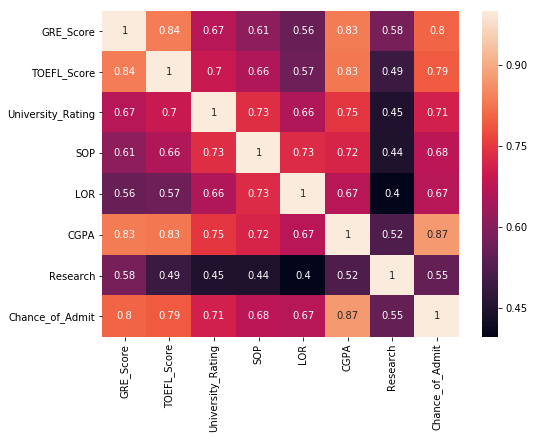

In [9]:
# Visualize correlation between independant variables and the target variable. Here, the target variable is 'Chance_of_Admit'
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [10]:
# Correlation factors for 'Chance_of_Admit'.
df.corr()['Chance_of_Admit'].sort_values(ascending=False)

Chance_of_Admit      1.000000
CGPA                 0.873289
GRE_Score            0.802610
TOEFL_Score          0.791594
University_Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance_of_Admit, dtype: float64

It is clear that CGPA has highest correlation with Chance_of_Admit followed by GRE_Score and TOEFL_Score. <br/>
Also, there is a little correlation of University_Rating, SOR and LOR with the target variable.

<b><font color='blue'>Simple Linear Regression with OLS(Ordinary Least Squares).<br/></b>

In [11]:
from sklearn import linear_model

In [12]:
X = df.drop(['Chance_of_Admit','Research'],axis = 1)
Y = df['Chance_of_Admit']

model = linear_model.LinearRegression()
model.fit(X,Y)

print('\nCoefficients: \n', model.coef_)
print('\nIntercept: \n', model.intercept_)


Coefficients: 
 [ 0.00227608  0.00275344  0.00606202 -0.0019614   0.0227486   0.11987489]

Intercept: 
 -1.4138594435308127


<b>Linear regression equation with coefficients and intercept(from the above result) would be:</b><br/>
Chance_of_Admit = 0.00227608GRE_Score + 0.00275344TOEFL_Score + 0.00606202University_Rating - 0.0019614SOP + 0.0227486LOR + 0.11987489CGPA - 1.4138594435308127<br/>

But we are more interested in identifying the significance of these coefficients. We can determine this using Statistical T-test. Let us use "statsmodels" to get T-test, p values and many other statistical information.

<b><font color='blue'>Model1:<font/> Linear Regression using statsmodels

<b>Interpreting estimated coefficients.

In [13]:
import statsmodels.api as sm

In [14]:
# We need to manually add a constant in statsmodels' sm
X = df.drop(['Chance_of_Admit','Research'],axis = 1)
Y = df['Chance_of_Admit']

X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     259.9
Date:                Tue, 21 May 2019   Prob (F-statistic):          1.99e-133
Time:                        16:54:36   Log-Likelihood:                 532.59
No. Observations:                 400   AIC:                            -1051.
Df Residuals:                     393   BIC:                            -1023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4139      0.115    -12.247      0.000      -1.641      -1.187
GRE_Score             0.0023      0.001      3.938      0.000       0.001       0.003
TOEFL_Score           0.0028      0.001      2.503      0.013       0.001       0.005
University_Rating     0.0061      0.005      1.258      0.209      -0.003       0.016
SOP                  -0.0020      0.006     -0.350      0.727      -0.013       0.009
LOR                   0.0227      0.006      4.063      0.000       0.012       0.034
CGPA                  0.1199      0.012      9.709      0.000       0.096       0.144
==============================================================================
Omnibus:                       93.313   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.389
Skew:                          -1.190   Prob(JB):                     5.61e-46
Kurtosis:                       5.615   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above, p-values of GRE_Score, TOEFL_Score, LOR and CGPA are less than 0.05 and p-values of University_Rating and SOP are greater than 0.05.<br/>
This implies that the coefficient of University_Rating and SOP are effectively zero from a statistical point of view. They are simply not significant, and we can say that it appears to be no relationship between Chance_of_Admit and the features (University_Rating, SOP). <br/>

Let us remove these 2 variables and see if there is an improvement in the model or not.

<b><font color='blue'>Model2:<font/> Remove University_Rating and SOP

In [15]:
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP'],axis = 1)
Y = df['Chance_of_Admit']

X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     389.9
Date:                Tue, 21 May 2019   Prob (F-statistic):          1.12e-135
Time:                        16:54:36   Log-Likelihood:                 531.78
No. Observations:                 400   AIC:                            -1054.
Df Residuals:                     395   BIC:                            -1034.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4631      0.106    -13.836      0.000      -1.671      -1.255
GRE_Score       0.0023      0.001      4.023      0.000       0.001       0.003
TOEFL_Score     0.0029      0.001      2.718      0.007       0.001       0.005
LOR             0.0240      0.005      4.952      0.000       0.014       0.033
CGPA            0.1228      0.012     10.367      0.000       0.100       0.146
==============================================================================
Omnibus:                       92.083   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.025
Skew:                          -1.180   Prob(JB):                     8.20e-45
Kurtosis:                       5.571   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Evaluating performance by comparing <font color='blue'>model1</font> and <font color='blue'>model2

- We can use an F-test to compare two models if one of them is nested within the other. That is, if the feature set in a model is a subset of the feature set of the other, then we can use F-test. In this case, we say that the model with higher F statistic is superior to the other one.
- We can also use adjusted R-squared. The higher adjusted R-squared, the better the model explains the target variable.
- Using information criteria is also a common way of comparing different models and selecting the best one. Here, the two information criteria are Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). Both take into consideration the sum of the squared errors (SSE), the sample size, and the number of parameters. The lower AIC and BIC, the better the model explains the target variable.

In [16]:
performance_stats = pd.DataFrame()

In [17]:
# This information is drawn from model1 and model2 summary tables above.
performance_stats['F-statistic'] = [259.9,389.9]
performance_stats['Adj_R-squared'] = [0.796,0.796]
performance_stats['AIC'] = [-1051,-1054]
performance_stats['BIC'] = [-1023,-1034]

In [18]:
performance_stats

,F-statistic,Adj_R-squared,AIC,BIC
0,259.9,0.796,-1051,-1023
1,389.9,0.796,-1054,-1034


From the above, we observe that model2 is slightly better than model1(based on the 3 rules from the bullet points). <br/>
The target variable(Chance_of_Admit) is skewed. Let us transform it to a normal distribution and test the model again.

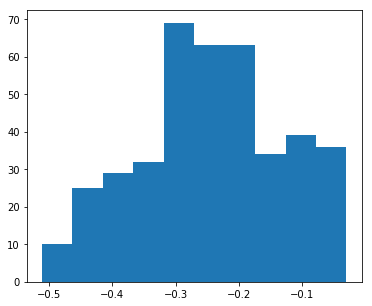

In [19]:
# Transform to normal distribution using boxcox transformation.
from scipy.stats import boxcox
boxcox_Chance_of_Admit,_ = boxcox(df['Chance_of_Admit'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_Chance_of_Admit)
plt.show()


Still it is NOT a complete normal distribution but some what better than before. Let us rerun the model with the transformed target variable.

<b><font color='blue'>Model3: <font/>Apply boxcox transformation to the target variable.

In [20]:
df['boxcox_Chance_of_Admit'] = boxcox_Chance_of_Admit

X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP','boxcox_Chance_of_Admit'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     boxcox_Chance_of_Admit   R-squared:                       0.818
Model:                                OLS   Adj. R-squared:                  0.816
Method:                     Least Squares   F-statistic:                     443.2
Date:                    Tue, 21 May 2019   Prob (F-statistic):          1.49e-144
Time:                            16:54:36   Log-Likelihood:                 640.78
No. Observations:                     400   AIC:                            -1272.
Df Residuals:                         395   BIC:                            -1252.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.0358      0.081    -25.282      0.000      -2.194      -1.877
GRE_Score       0.0019      0.000      4.400      0.000       0.001       0.003
TOEFL_Score     0.0025      0.001      3.054      0.002       0.001       0.004
LOR             0.0189      0.004      5.115      0.000       0.012       0.026
CGPA            0.0984      0.009     10.905      0.000       0.081       0.116
==============================================================================
Omnibus:                       82.852   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.673
Skew:                          -1.098   Prob(JB):                     1.43e-37
Kurtosis:                       5.315   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# These values are taken from the above summary tables for model1, model2 and model3.
performance_statistics = pd.DataFrame()
performance_statistics['F-statistic'] = [259.9,389.9,443.2]
performance_statistics['Adj_R-squared'] = [0.796,0.796,0.816]
performance_statistics['AIC'] = [-1051,-1054,-1272]
performance_statistics['BIC'] = [-1023,-1034,-1252]

In [22]:
performance_statistics['Model'] = ['model1','model2','model3']
performance_statistics.set_index('Model')

,F-statistic,Adj_R-squared,AIC,BIC
Model,,,,
model1,259.9,0.796,-1051,-1023
model2,389.9,0.796,-1054,-1034
model3,443.2,0.816,-1272,-1252


Wow!! After transforming target variable to normal distribution, model3's performance stats have been improved.<br/>
It's time to make predictions now.

<b><font color='blue'>Model4: Making predictions.

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP','boxcox_Chance_of_Admit'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)
X_train = sm.add_constant(X_train)

model4 = sm.OLS(y_train, X_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     boxcox_Chance_of_Admit   R-squared:                       0.813
Model:                                OLS   Adj. R-squared:                  0.811
Method:                     Least Squares   F-statistic:                     343.1
Date:                    Tue, 21 May 2019   Prob (F-statistic):          2.00e-113
Time:                            16:54:36   Log-Likelihood:                 512.37
No. Observations:                     320   AIC:                            -1015.
Df Residuals:                         315   BIC:                            -995.9
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.0375      0.090    -22.692      0.000      -2.214      -1.861
GRE_Score       0.0021      0.000      4.372      0.000       0.001       0.003
TOEFL_Score     0.0022      0.001      2.389      0.017       0.000       0.004
LOR             0.0203      0.004      4.795      0.000       0.012       0.029
CGPA            0.0959      0.010      9.623      0.000       0.076       0.116
==============================================================================
Omnibus:                       57.725   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.335
Skew:                          -1.017   Prob(JB):                     2.69e-22
Kurtosis:                       4.820   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

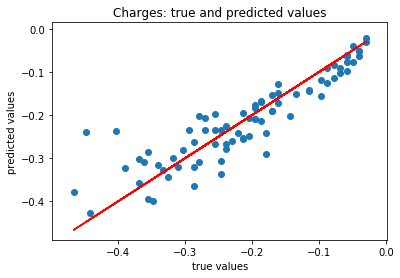

In [24]:
# We add constant to the model as it's a best practice to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = model4.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In the graph, we see that our model predicts the higher values of the target better than the lower values. By using visualizations like this, we can more intuitively understand the performance of the models. But, we need to find more accurate ways of assessing our models. Let us find out some metrics to evaluate how good the predictions are. Below are those metrics.

In [25]:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


Mean absolute error of the prediction is: 0.034912971171279554
Mean squared error of the prediction is: 0.002375850238473301
Root mean squared error of the prediction is: 0.04874269420614028
Mean absolute percentage error of the prediction is: 19.33819176289874


<b><font color='blue'>Model5: <font/>Apply boxcox transformation to the features.

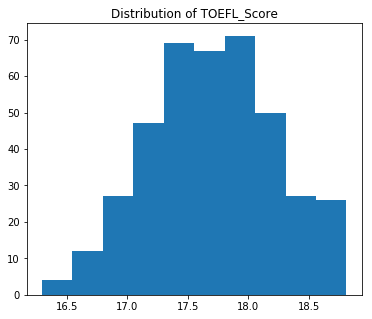

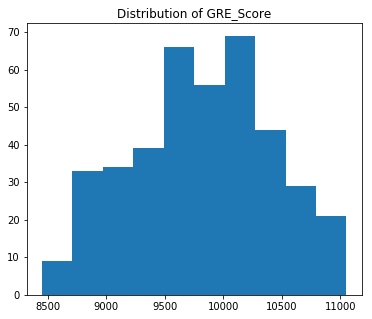

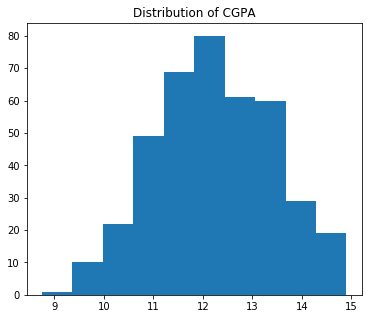

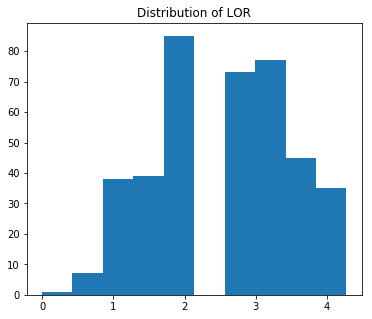

In [26]:
# Transform to normal distribution using boxcox transformation.
boxcox_TOEFL_Score,_ = boxcox(df['TOEFL_Score'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_TOEFL_Score)
plt.title("Distribution of TOEFL_Score")
plt.show()

boxcox_GRE_Score,_ = boxcox(df['GRE_Score'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_GRE_Score)
plt.title("Distribution of GRE_Score")
plt.show()

boxcox_CGPA,_ = boxcox(df['CGPA'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_CGPA)
plt.title("Distribution of CGPA")
plt.show()

boxcox_LOR,_ = boxcox(df['LOR'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_LOR)
plt.title("Distribution of LOR")
plt.show()

In [27]:
df['boxcox_TOEFL_Score'] = boxcox_TOEFL_Score
df['boxcox_GRE_Score'] = boxcox_GRE_Score
df['boxcox_CGPA'] = boxcox_CGPA
df['boxcox_LOR'] = boxcox_LOR

In [28]:
X1 = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y1 = df['boxcox_Chance_of_Admit']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 450)
X_train1 = sm.add_constant(X_train1)

model5 = sm.OLS(y_train1, X_train1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     boxcox_Chance_of_Admit   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.812
Method:                     Least Squares   F-statistic:                     344.8
Date:                    Tue, 21 May 2019   Prob (F-statistic):          1.06e-113
Time:                            16:54:37   Log-Likelihood:                 513.01
No. Observations:                     320   AIC:                            -1016.
Df Residuals:                         315   BIC:                            -997.2
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6967      0.124    -13.701      0.000      -1.940      -1.453
boxcox_TOEFL_Score     0.0232      0.010      2.293      0.023       0.003       0.043
boxcox_GRE_Score    4.048e-05   9.24e-06      4.378      0.000    2.23e-05    5.87e-05
boxcox_CGPA            0.0487      0.005      9.667      0.000       0.039       0.059
boxcox_LOR             0.0188      0.004      4.800      0.000       0.011       0.026
==============================================================================
Omnibus:                       56.985   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.547
Skew:                          -1.008   Prob(JB):                     6.57e-22
Kurtosis:                       4.804   Cond. No.                     4.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

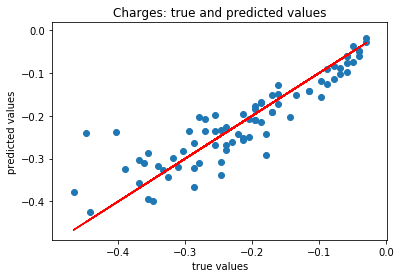

In [29]:
# We add constant to the model as it's a best practice to do so every time!
X_test1 = sm.add_constant(X_test1)

# We are making predictions here
y_preds1 = model5.predict(X_test1)

plt.scatter(y_test1, y_preds1)
plt.plot(y_test1, y_test1, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [30]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test1, y_preds1)))
print("Mean squared error of the prediction is: {}".format(mse(y_test1, y_preds1)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test1, y_preds1)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test1 - y_preds1) / y_test1)) * 100))


Mean absolute error of the prediction is: 0.034700915500579424
Mean squared error of the prediction is: 0.002361458821726707
Root mean squared error of the prediction is: 0.048594843571378096
Mean absolute percentage error of the prediction is: 19.021464582678973


In [31]:
print("Root mean squared error of MODEL4 and MODEL5 are {}  and  {}".format(rmse(y_test, y_preds),rmse(y_test1, y_preds1)))


Root mean squared error of MODEL4 and MODEL5 are 0.04874269420614028  and  0.048594843571378096


We can observe that RMSE for model5 is slightly decreased due to transforming independent variables(features) to normal distributions.

<b><font color='blue'>KNN Regressor

In [32]:
# KNN Regression model with cross validation.
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

score = cross_val_score(knn, X, Y, cv=5)
print("Score : ",score)
print("Variance : ",score.std()**2)

Score :  [0.53450214 0.75297358 0.56805563 0.5916466  0.79568753]
Variance :  0.011055597912900509


In [33]:
# KNN Regression model with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10,weights='distance')
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

score = cross_val_score(knn_w, X, Y, cv=5)
print("Score : ",score)

print("Variance : ",score.std()**2)

Score :  [0.55260435 0.73178501 0.59094117 0.64110217 0.81148419]
Variance :  0.008920950698579247


In [34]:
# KNN Regression model with RMSE
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

knn.fit(X_train,y_train)
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print("RMSE for the prediction of trained data is",rmse(y_train, pred_train))
print("RMSE for the prediction of test data is",rmse(y_test, pred_test))

RMSE for the prediction of trained data is 0.05724028033161585
RMSE for the prediction of test data is 0.05947074139814109


<b><font color='blue'>KNN Classifier

Let us change the column 'Chance_of_Admit' so that it holds boolean values(0 and 1) in order to use it for classification. <br/>
- Here on, when ever I create a classification model, I use the dataframe "data" which holds boolean value for 'Chance_of_Admit'.
- When I create a regression model, I use the original data frame "df".

In [35]:
data = df[['GRE_Score','TOEFL_Score','CGPA','LOR','Chance_of_Admit']]
data.loc[data['Chance_of_Admit']>=0.50,'Chance_of_Admit'] = 1
data.loc[data['Chance_of_Admit']<0.50,'Chance_of_Admit'] = 0
data['Chance_of_Admit'] = data['Chance_of_Admit'].astype('int')

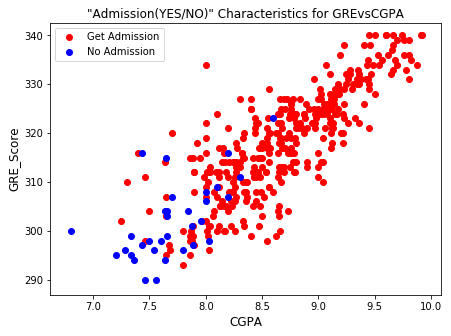

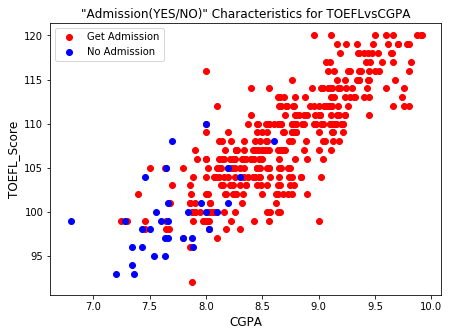

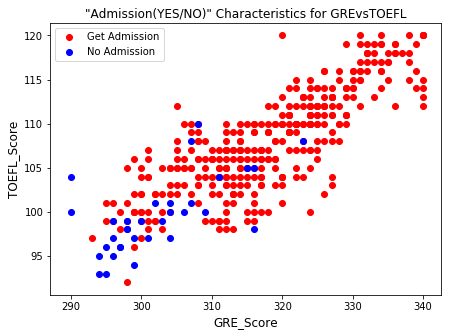

In [36]:
# Look at our data.
plt.figure(figsize=(7,5))

plt.scatter(
    data[data['Chance_of_Admit'] == 1].CGPA,
    data[data['Chance_of_Admit'] == 1].GRE_Score,
    color='red'
)
plt.scatter(
    data[data['Chance_of_Admit'] == 0].CGPA,
    data[data['Chance_of_Admit'] == 0].GRE_Score,
    color='blue'
)

plt.legend(['Get Admission', 'No Admission'])
plt.title('"Admission(YES/NO)" Characteristics for GREvsCGPA',fontsize=12)
plt.xlabel('CGPA',fontsize=12)
plt.ylabel('GRE_Score',fontsize=12)
plt.show()


plt.figure(figsize=(7,5))

plt.scatter(
    data[data['Chance_of_Admit'] == 1].CGPA,
    data[data['Chance_of_Admit'] == 1].TOEFL_Score,
    color='red'
)
plt.scatter(
    data[data['Chance_of_Admit'] == 0].CGPA,
    data[data['Chance_of_Admit'] == 0].TOEFL_Score,
    color='blue'
)

plt.legend(['Get Admission', 'No Admission'])
plt.title('"Admission(YES/NO)" Characteristics for TOEFLvsCGPA',fontsize=12)
plt.xlabel('CGPA',fontsize=12)
plt.ylabel('TOEFL_Score',fontsize=12)
plt.show()


plt.figure(figsize=(7,5))

plt.scatter(
    data[data['Chance_of_Admit'] == 1].GRE_Score,
    data[data['Chance_of_Admit'] == 1].TOEFL_Score,
    color='red'
)
plt.scatter(
    data[data['Chance_of_Admit'] == 0].GRE_Score,
    data[data['Chance_of_Admit'] == 0].TOEFL_Score,
    color='blue'
)

plt.legend(['Get Admission', 'No Admission'])
plt.title('"Admission(YES/NO)" Characteristics for GREvsTOEFL',fontsize=12)
plt.xlabel('GRE_Score',fontsize=12)
plt.ylabel('TOEFL_Score',fontsize=12)
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)

X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

neighbors.fit(X,Y)

print(neighbors.predict([[337,118,9.65,4.5]]))
print(neighbors.predict_proba([[337,118,9.65,4.5]]))

[1]
[[0. 1.]]


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'GRE_Score': stats.zscore(data.GRE_Score),
    'TOEFL_Score': stats.zscore(data.TOEFL_Score),
    'CGPA': stats.zscore(data.CGPA),
    'LOR': stats.zscore(data.LOR)
})

# Fit our model.
Y = data['Chance_of_Admit']
neighbors.fit(X, Y)

print(neighbors.predict([[337,118,9.65,4.5]]))
print(neighbors.predict_proba([[337,118,9.65,4.5]]))

[1]
[[0. 1.]]


<b><font color='blue'>Decision trees.

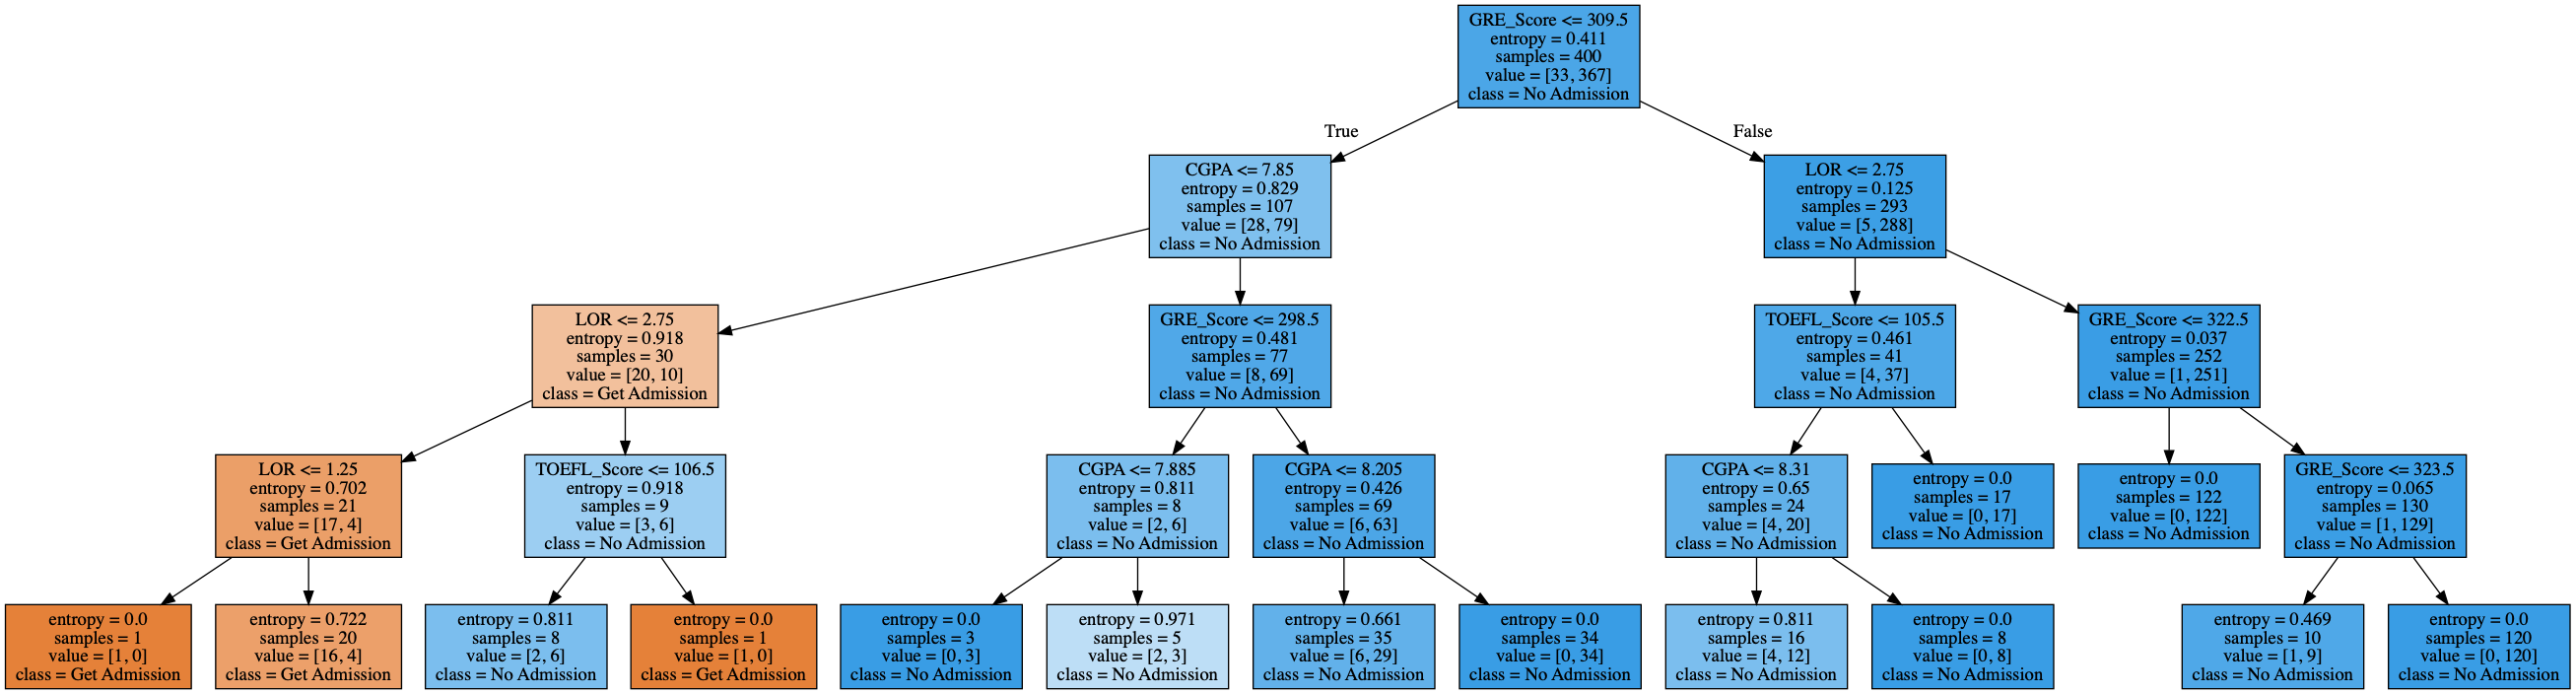

In [39]:
# Decision tree classifier.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Get Admission', 'No Admission'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [40]:
pred = decision_tree.predict(X)
print("RMSE is : ",rmse(Y, pred))

RMSE is :  0.21794494717703367


In [41]:
# Decision tree Regressor.
X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

model = tree.DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("RMSE is : ",rmse(y_test, y_pred))

RMSE is :  0.19364916731037085


<b><font color='blue'>Ensemble modeling.

In [42]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

score = cross_val_score(rfc, X, Y, cv=10)
print("Cross validation Score : ",score)
print("Variance : ",score.std()**2)

Cross validation Score :  [0.87804878 0.87804878 0.92682927 0.925      0.925      0.95
 0.975      0.94871795 0.8974359  0.87179487]
Variance :  0.0011140843308689247


<b><font color='blue'>Linear SVM

In [43]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
print("RMSE is : ",rmse(y_test, y_pred))

RMSE is :  0.19364916731037085


<b><font color='blue'>SVM Regressor

In [44]:
from sklearn.svm import SVR
svr = SVR()

X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

svr.fit(X,Y)
print("SVR Score is : ",svr.score(X, Y))
print("Cross validation score is : ",cross_val_score(svr, X, Y, cv=5))
print("Variance : ",cross_val_score(svr, X, Y, cv=5).std()**2)

SVR Score is :  0.6928243849344998
Cross validation score is :  [ 0.11093676 -0.00173822  0.         -1.29112929  0.24654914]
Variance :  0.31302470958677703
